<a href="https://colab.research.google.com/github/strawndri/time-series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extras

## Time Series é uma coleção de dados que segue uma ordem cronológica, um **tempo sequencial**. O período que é representado pode ser em segundos, minutos, horas, dias, meses, anos, etc.

> **Conteúdo da Alura**:
- Crescimento proporcional entre linhas (time series) utilizando pandas: 
https://www.alura.com.br/artigos/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas

# Importando Bibliotecas

In [1]:
import pandas as pd

!pip install seaborn
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Alucar - Análise de Vendas

## Importando a Base de Dados

In [5]:
url = ('https://raw.githubusercontent.com/strawndri/time-series/main/Data/alucar.csv')
alucar = pd.read_csv(url)
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Analisando o tamanho da base de dados

In [8]:
print(f'A quantidade de linhas e colunas é: {alucar.shape}')

A quantidade de linhas e colunas é: (24, 2)


## Analisando se há valores nulos

In [15]:
# use .sum() duas vezes para somar as duas colunas  
valores_nulos = alucar.isna().sum().sum()
print(f'Quantidade de valores nulos: {valores_nulos}')

Quantidade de valores nulos: 0


## Tipos dos dados

In [19]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [18]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [21]:
# transformando os valores do "mês" em datas
alucar['mes'] = pd.to_datetime(alucar['mes'])

## Gráfico das Vendas

Há algumas padronizações a serem utilizadas quando estamos trabalhando com gráficos (Data Visualization).

Para mais informações, acesse: *https://urbaninstitute.github.io/graphics-styleguide/*

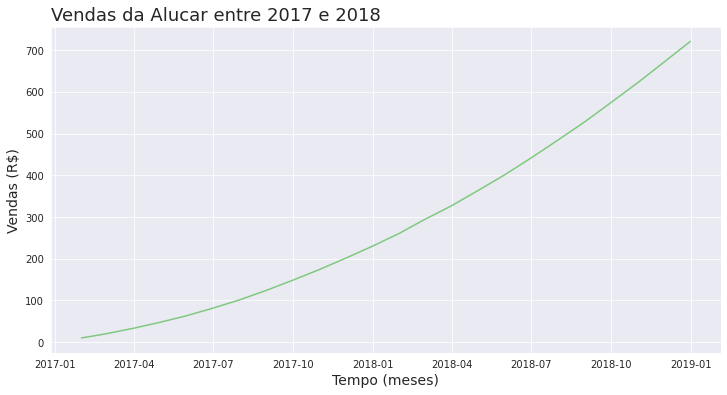

In [48]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar entre 2017 e 2018', fontsize=18, loc='left')

ax.set_xlabel('Tempo (meses)', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax